<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Bayesian-Analysis" data-toc-modified-id="Bayesian-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bayesian Analysis</a></span><ul class="toc-item"><li><span><a href="#Application-of-Bayes'-Theorem" data-toc-modified-id="Application-of-Bayes'-Theorem-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Application of Bayes' Theorem</a></span></li><li><span><a href="#Bayesian-Analysis" data-toc-modified-id="Bayesian-Analysis-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Bayesian Analysis</a></span></li></ul></li></ul></div>

# Bayesian Analysis

## Application of Bayes' Theorem

Suppose we have 3 jars with 100 marbles in each.

- Jar 1 has 40 blue marbles, 30 red marbles, and 30 green marbles.
- Jar 2 has 60 blue marbles, 20 red marbles, and 20 green marbles.
- Jar 3 has 10 blue marbles, 30 red marbles, and 60 green marbles.

You pick a marble from one of the jars at random, and the marble is green. What are the probabilities that the marble came from each of the three jars?

we would need to know what our prior probabilities were and our likelihoods

In [1]:
import numpy as np

In [2]:
priors = [1/3,1/3,1/3]

The likelihoods in this case would just be the percentages of green marbles in each jar.

In [3]:
likelihoods = [0.3,0.2,0.6]

We can define a function in Python that accepts a list of priors and corresponding likelihoods. Our function will compute the marginal (marg) and then use Bayes' Theorem to calculate the posterior probabilities for the each of the hypotheses (post).m

In [4]:
def bayes_rule(priors, likelihoods):
    marg = sum(np.multiply(priors, likelihoods))
    post = np.divide(np.multiply(priors, likelihoods), marg)
    return post

bayes_rule(priors, likelihoods)

array([0.27272727, 0.18181818, 0.54545455])

From these results, we can see that there is a 27.27% chance that the green marble we drew came from Jar 1, a 18.18% chance that it came from Jar 2, and a 54.55% chance that it came from Jar 3.

Suppose you had picked a blue marble instead of a green one. We would just need to update our likelihoods to account for the proportion of each jar whose marbles were blue.

In [6]:
likelihoods = [0.4,0.6,0.1]
bayes_rule(priors, likelihoods)

array([0.36363636, 0.54545455, 0.09090909])

There's a 36.36% chance that the green marble we chose came from Jar 1, a 54.54% chance it came from Jar 2, and only a 9% chance that it came from Jar 3.

## Bayesian Analysis

Suppose we have just launched an online store that sells fidget spinners, and we are trying to estimate what percentage of visitors to our online store will make a purchase. We can set this up as a Bayesian problem and arrive at a probability distribution as follows.

Prior to seeing any traffic or purchase data, we have no idea what to expect so we will start with the assumption that all percentages are equally likely. This is called a uniform prior because we can use a uniform distribution to represent the fact that every rate has an equal chance of being the actual rate of purchase. To set this up in Python, we are going to use Numpy to generate a uniform distribution from 100,000 random draws of numbers between 0 and 1.

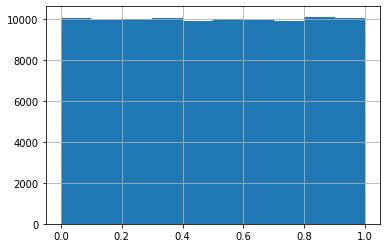

In [12]:
import pandas as pd
%matplotlib inline

n_draws = 100000
prior = pd.Series(np.random.uniform(0, 1, size=n_draws))

prior.hist()

Now it's time to observe some data and see how this affects our estimates. Suppose on the first day, 50 people visited our site and 10 of them made a purchase. We are going to record the number of purchases in a variable called observed.

In [13]:
observed = 10

Ware also going to create a generative model that will randomly draw from our prior uniform distribution, simulate 50 people coming to our website a large number of time, and see how many times we get a result that is in line with the result we have observed. To do this in Python, we are going to define a generative_model function that accepts a random probability parameter from our prior and then performs 50 binomial draws using that probability.

In [14]:
def generative_model(param):
    result = np.random.binomial(50, param)
    return result

We are going to create a empty list that is going to contain our simulated results (sim_data) and then populate it by appending the results when each value in our prior distribution is plugged into our generative model.

In [15]:
sim_data = list()

for p in prior:
    sim_data.append(generative_model(p))

Finally, we are going to arrive at our posterior distribution by selecting only the values from our prior distribution that generated instances where the simulated result matched our observed result of 10 purchases.

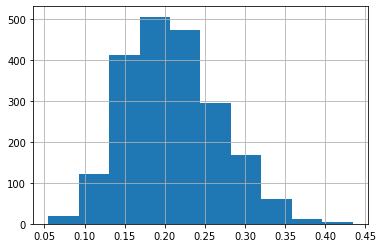

In [16]:
posterior = prior[list(map(lambda x: x == observed, sim_data))]
#Below is what our posterior distribution looks like.

posterior.hist()

We can see just by looking at this that the updated probability of someone making a purchase from our online store is likely between 10% and 30% and most likely somewhere between 17% and 20%.

We can also calculate some statistics for our posterior distribution in addition to visualizing it. This will show us the mean, range, and standard deviation of our posterior distribution in addition to the quartiles.

In [17]:
posterior.describe()

count    2070.000000
mean        0.209710
std         0.057883
min         0.054746
25%         0.166412
50%         0.204835
75%         0.247003
max         0.434066
dtype: float64

We can see that both the mean and the median are approximately 21%. If we wanted to, we could also calculate a 90% credible interval for this distribution as follows.

In [18]:
print(posterior.quantile(.025), '|', posterior.quantile(.975))

0.11189593939822197 | 0.33040857863604833


Finally, we could also round the values in the posterior distribution to whole percents and calculate the most likely one along with its probability. This is known as the maximum likelihood estimate.

In [11]:
rounded = posterior.round(2)
mode = rounded.mode()[0]
probability = list(rounded).count(mode)/len(rounded)
print('Maximum Likelihood Estimate: ', mode, '|',probability)

Maximum Likelihood Estimate:  0.19 | 0.08122362869198312


This tells us that given the data we have thus far, it is most likely that 19% of the visitors to our online store will make a purchase.